# Libraries

In [1]:
import itertools
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from statsmodels import api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LinearRegression

# Functions

In [2]:
def nmae(true_df, pred_df):
    target_idx = true_df.iloc[:,0]
    pred_df = pred_df[pred_df.iloc[:,0].isin(target_idx)]
    pred_df = pred_df.sort_values(by=[pred_df.columns[0]], ascending=[True])
    true_df = true_df.sort_values(by=[true_df.columns[0]], ascending=[True])
    
    true = true_df.iloc[:,1].to_numpy()
    pred = pred_df.iloc[:,1].to_numpy()
    
    score = np.mean((np.abs(true-pred))/true)
    
    return score

# Modeling

In [13]:
data = pd.read_csv('data/merge_total_211206.csv', encoding='cp949', index_col=0)
data = data.drop(labels=['특수일_x', '특수일_y'], axis=1)

In [14]:
data.head()

,연월일,시간,구분,공급량,year,month,day,weekday,추정치,temp
0,2013-01-01,0,0,2497.129,2013,1,1,1,-0.173,-7.080460
1,2013-01-01,1,0,2363.265,2013,1,1,1,-0.173,-7.491954
2,2013-01-01,2,0,2258.505,2013,1,1,1,-0.173,-7.732184
3,2013-01-01,3,0,2243.969,2013,1,1,1,-0.173,-7.840230
4,2013-01-01,4,0,2344.105,2013,1,1,1,-0.173,-8.059770


In [6]:
data['구분'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [18]:
data_0 = data[data['구분'] == 0].reset_index(drop=True)
data_1 = data[data['구분'] == 1].reset_index(drop=True)
data_2 = data[data['구분'] == 2].reset_index(drop=True)
data_3 = data[data['구분'] == 3].reset_index(drop=True)
data_4 = data[data['구분'] == 4].reset_index(drop=True)
data_5 = data[data['구분'] == 5].reset_index(drop=True)
data_6 = data[data['구분'] == 6].reset_index(drop=True)

In [17]:
P_VALUE = 0.05

for i in range(data['구분'].unique().shape[0]):
    data_i = data[data['구분'] == i]
    result = adfuller(data_i['공급량'])
    
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    
    if result[1] < P_VALUE:
        print('data_{} is a stationary process.'.format(i))
    else:
        print('data_{} is a non-stationary process.'.format(i))
        
    print('='*50)

ADF Statistic: -5.120396
p-value: 0.000013
data_0 is a stationary process.
ADF Statistic: -4.570727
p-value: 0.000146
data_1 is a stationary process.
ADF Statistic: -5.173029
p-value: 0.000010
data_2 is a stationary process.
ADF Statistic: -4.296061
p-value: 0.000451
data_3 is a stationary process.
ADF Statistic: -4.334661
p-value: 0.000387
data_4 is a stationary process.
ADF Statistic: -6.130280
p-value: 0.000000
data_5 is a stationary process.
ADF Statistic: -4.598341
p-value: 0.000130
data_6 is a stationary process.


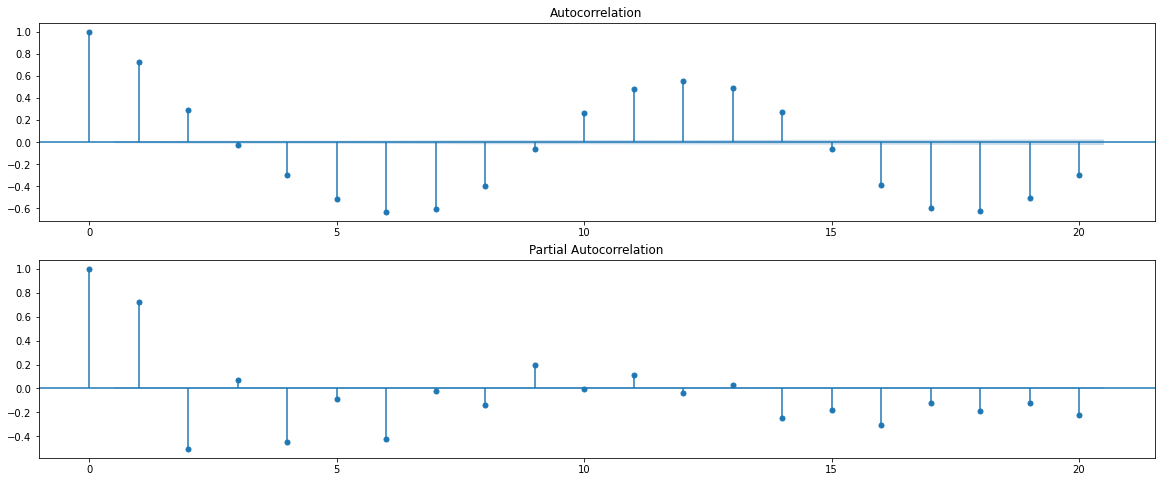

In [26]:
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf((data_0['공급량'] - data_0['공급량'].shift(2))[2:], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf((data_0['공급량'] - data_0['공급량'].shift(2))[2:], lags=20, ax=ax2)

# 1. Univariate Time Series Regression

# 2. Multivariate Time Series Regression

## 2-1. ARIMAX

## 2-2. SARIMAX

# 1. SARIMAX

In [11]:
# generate (seasonal) pdq combination
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        model = SARIMAX(endog=, exog=, order=param, seasonal_order=param_seasonal,
                       enforce_stationaryity=True, enforce_invertivility=True)

In [63]:
pd.Series(pd.date_range('2013-01-01', end='2018-12-31', freq='H'))

0       2013-01-01 00:00:00
1       2013-01-01 01:00:00
2       2013-01-01 02:00:00
3       2013-01-01 03:00:00
4       2013-01-01 04:00:00
                ...        
52556   2018-12-30 20:00:00
52557   2018-12-30 21:00:00
52558   2018-12-30 22:00:00
52559   2018-12-30 23:00:00
52560   2018-12-31 00:00:00
Length: 52561, dtype: datetime64[ns]

In [62]:
data_0

,연월일,시간,구분,공급량,year,month,day,weekday,추정치,temp
0,2013-01-01,0,0,2497.129,2013,1,1,1,-0.173,-7.080460
1,2013-01-01,1,0,2363.265,2013,1,1,1,-0.173,-7.491954
2,2013-01-01,2,0,2258.505,2013,1,1,1,-0.173,-7.732184
3,2013-01-01,3,0,2243.969,2013,1,1,1,-0.173,-7.840230
4,2013-01-01,4,0,2344.105,2013,1,1,1,-0.173,-8.059770
...,...,...,...,...,...,...,...,...,...,...
52579,2018-12-31,19,0,3040.868,2018,12,31,0,1.000,-1.017778
52580,2018-12-31,20,0,2973.577,2018,12,31,0,1.000,-1.786667
52581,2018-12-31,21,0,2840.272,2018,12,31,0,1.000,-2.468889
52582,2018-12-31,22,0,2692.385,2018,12,31,0,1.000,-3.095556


# 2. Trigonometric Model

## Model: $y_t = \beta_0 + \beta_1t + \beta_2\sin(\frac{2\pi t}{L}) + \beta_3\cos(\frac{2\pi t}{L}) + \epsilon_t$

In [44]:
idx = data[data['연월일'] == '2018-01-01'].index[0]

In [45]:
L = 24 * 365 # 24hours * 365days

trig_data = pd.DataFrame()
trig_data['x1'] = range(data.shape[0])
trig_data['x2'] = trig_data['x1'].apply(lambda x: np.sin((2 * np.pi * x) / L))
trig_data['x3'] = trig_data['x1'].apply(lambda x: np.cos((2 * np.pi * x) / L))
trig_data['target'] = data['공급량']

In [46]:
lr = LinearRegression()
lr.fit(X=trig_data.loc[:idx, ['x1', 'x2', 'x3']], y=trig_data.loc[:idx, 'target'])

LinearRegression()

In [47]:
pred_y = lr.predict(X=trig_data.loc[idx:, ['x1', 'x2', 'x3']])

In [55]:
score = np.mean((np.abs(trig_data.loc[idx:, 'target'] - pred_y)) / trig_data.loc[idx:, 'target'])
score

2.903017950873462